In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import csv
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold 
from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
import scipy.misc as smp

import warnings
warnings.filterwarnings(action="ignore")
%matplotlib inline


In [2]:
# Load the data
from scipy.io import loadmat
mnist = loadmat("mnist-original.mat")
mnist_data = mnist["data"].T
mnist_label = mnist["label"][0]

In [3]:
X = mnist_data.astype('int64')
y = mnist_label.astype('int64')

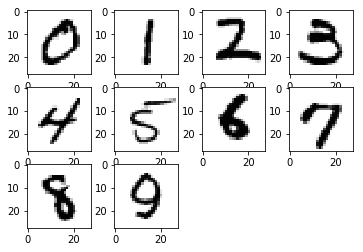

In [4]:
# Show the data (refer kaggle)
def image(num1, num2, S):
    plt.gray()
    plt.subplot(3,4,num1)
    plt.imshow((16-S[num2]/255*16).reshape(28,28))
    return
J = {(i+1):(i*6650) for i in list(range(10))}
for i in list(range(11))[1:11]: image(i,J[i],X)

In [5]:
# Split the data
X_train, X_E_test, y_train, y_E_test = train_test_split(X, y, test_size=0.9, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [7]:
# Check the target data's unique values 
pd.Series(y).value_counts()

1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
dtype: int64

In [6]:
# Function to visualize category data
# Parameters: data, categorical column name, pie (True: draw pie chart, False)
def printCatUnique(data, columnName, pie = False):
    print(data[columnName].unique())
    print("''{0}'' Column Unique count : {1}".format(columnName, len(data[columnName].unique())))
    
    if pie==True:
        data[columnName].value_counts().plot.pie(autopct='%.3f%%', figsize=(8,8))
        plt.title(columnName)
        plt.show()

[9 8 0 4 3 6 7 5 2 1]
''y_train'' Column Unique count : 10


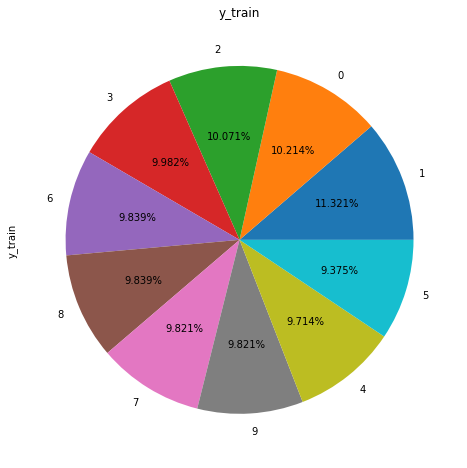

In [8]:
# Check the training set's data distribution 
printCatUnique(pd.DataFrame(y_train, columns=['y_train']), 'y_train', True)

In [9]:
# CHekc the shape 
X.shape

(70000, 784)

In [10]:
X_train.shape

(5600, 784)

In [11]:
X_test.shape

(1400, 784)

In [12]:
X_E_test.shape

(63000, 784)

In [13]:
# function to draw confusion matrix
# parameters: y_Acture, y_Predicted

def draw_confusion_matrix(y_test,y_pred):
    result= pd.DataFrame()

    result['y_test']= y_test
    result['y_pred']= y_pred

    confusion_matrix = pd.crosstab(result['y_test'], result['y_pred'], margins=True)
    sns.heatmap(confusion_matrix, annot=True)
    
    return

In [14]:
# training the model and print accuracy 
# parameters: model, X_train, X_test, y_train, y_test, confusion (Ture: drawe the matrix, Flase (default))
def getScore (model, X_train, X_test, y_train, y_test, confusion = False):    
    # Training the data
    model.fit(X_train, y_train)
    # get score and print
    score = model.score(X_test, y_test)
    print('Accuracy:', score)
     
    # draw the confusion matrix
    if confusion == True:
        print('confusion Matrix')
        y_pred = model.predict(X_test)
        draw_confusion_matrix (y_test,y_pred)
        return (model, score)
            
    return model

In [15]:
# Store the highest score of each model
bestScores = {'model': ['logistic',' decisionTree','svm'], 'acc': []}
Result_ensemble = {'model': ['logistic',' decisionTree','svm', 'ensemble'], 'acc': []}

In [16]:
# Model 1: Logistic Regression ---------------------------------
logistic = LogisticRegression(n_jobs=4)
logistic = getScore(logistic, X_train, X_test, y_train, y_test)

Accuracy: 0.8228571428571428


In [17]:
# First, Tune the solver
param_logistic = LogisticRegression (solver ='liblinear', n_jobs = 4)
param_logistic = getScore(param_logistic, X_train, X_test, y_train, y_test)

Accuracy: 0.8228571428571428


In [18]:
param_logistic = LogisticRegression (solver ='lbfgs', n_jobs = 4)
param_logistic = getScore(param_logistic, X_train, X_test, y_train, y_test)

Accuracy: 0.8478571428571429


In [19]:
param_logistic = LogisticRegression (solver ='sag', n_jobs = 4)
param_logistic = getScore(param_logistic, X_train, X_test, y_train, y_test)

Accuracy: 0.8885714285714286


In [20]:
# Set Solver = sag
# Second, Tune the max_iter

In [21]:
param_logistic = LogisticRegression (solver ='sag', max_iter =50, n_jobs = 4)
param_logistic = getScore(param_logistic, X_train, X_test, y_train, y_test)

Accuracy: 0.8957142857142857


In [22]:
param_logistic = LogisticRegression (solver ='sag', max_iter =100, n_jobs = 4)
param_logistic = getScore(param_logistic, X_train, X_test, y_train, y_test)

Accuracy: 0.8885714285714286


In [23]:
param_logistic = LogisticRegression (solver ='sag', max_iter =200, n_jobs = 4)
param_logistic = getScore(param_logistic, X_train, X_test, y_train, y_test)

Accuracy: 0.8857142857142857


Accuracy: 0.895
confusion Matrix


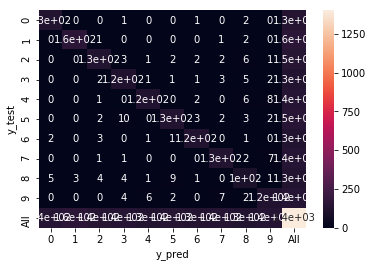

In [24]:
# Set solver = sag, max_iter = 50
# get maximum score and draw confusion matrix
param_logistic =  LogisticRegression (solver ='sag', max_iter =50, n_jobs = 4)
logistic ,acc = getScore(param_logistic, X_train, X_test, y_train, y_test, True)

# save model's score
bestScores['acc'].append(acc)

In [25]:
# Model 2: Decision Tree -----------------------------------------------------------
detree = DecisionTreeClassifier()
detree= getScore(detree, X_train, X_test, y_train, y_test)

Accuracy: 0.8


In [26]:
# Frist, Tune the criterion
param_dtree = DecisionTreeClassifier (criterion ='gini')
param_dtree = getScore(param_dtree, X_train, X_test, y_train, y_test)

Accuracy: 0.79


In [27]:
param_dtree = DecisionTreeClassifier (criterion ='entropy')
param_dtree = getScore(param_dtree, X_train, X_test, y_train, y_test)

Accuracy: 0.7928571428571428


Accuracy: 0.7928571428571428
confusion Matrix


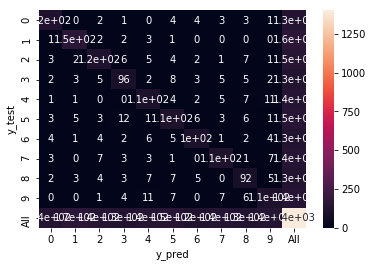

In [28]:
# Set criterion = gini
# get maximum score and draw confusion matrix
param_dtree = DecisionTreeClassifier (criterion ='gini')
detree, acc = getScore(param_dtree, X_train, X_test, y_train, y_test, True)

# save model score
bestScores['acc'].append(acc)

In [29]:
# Model 3: SVM --------------------------------------------

# First, Tune the kernel
param_svm = SVC (kernel = 'rbf')
param_svm = getScore(param_svm, X_train, X_test, y_train, y_test)

Accuracy: 0.11642857142857142


In [30]:
param_svm = SVC (kernel = 'linear')
param_svm = getScore(param_svm, X_train, X_test, y_train, y_test)

Accuracy: 0.9035714285714286


In [31]:
# Set the kernel = 'linear'
# Second, tune the C

In [32]:
param_svm = SVC (kernel = 'linear', C = 0.1)
param_svm = getScore(param_svm, X_train, X_test, y_train, y_test)

Accuracy: 0.9035714285714286


In [33]:
param_svm = SVC (kernel = 'linear', C = 1)
param_svm = getScore(param_svm, X_train, X_test, y_train, y_test)

Accuracy: 0.9035714285714286


In [34]:
param_svm = SVC (kernel = 'linear', C = 10)
param_svm = getScore(param_svm, X_train, X_test, y_train, y_test)

Accuracy: 0.9035714285714286


In [35]:
# Set the kernel ='linear'
# Third, tune the gamma
param_svm = SVC (kernel = 'linear', gamma = 10)
param_svm = getScore(param_svm, X_train, X_test, y_train, y_test)

Accuracy: 0.9035714285714286


In [36]:
param_svm = SVC (kernel = 'linear', gamma = 100)
param_svm = getScore(param_svm, X_train, X_test, y_train, y_test)

Accuracy: 0.9035714285714286


Accuracy: 0.9035714285714286
confusion Matrix


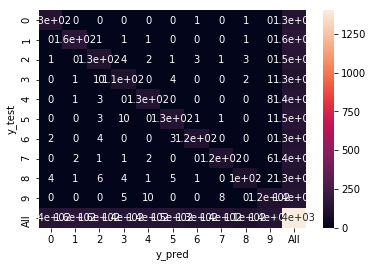

In [37]:
# Set the kernel ='linear'
# get maximum score and draw confusion matrix
param_svm = SVC (kernel = 'linear')
svm, acc = getScore(param_svm, X_train, X_test, y_train, y_test, True)

# save model score
bestScores['acc'].append(acc)

In [38]:
bestScores

{'model': ['logistic', ' decisionTree', 'svm'],
 'acc': [0.895, 0.7928571428571428, 0.9035714285714286]}

In [39]:
# Test ensemble
# Test with the model we learned earlier.
Result_ensemble['acc'].append(logistic.score(X_E_test, y_E_test))
Result_ensemble['acc'].append(detree.score(X_E_test, y_E_test))
Result_ensemble['acc'].append(svm.score(X_E_test, y_E_test))

In [40]:
# Ensemble

Accuracy: 0.909
confusion Matrix


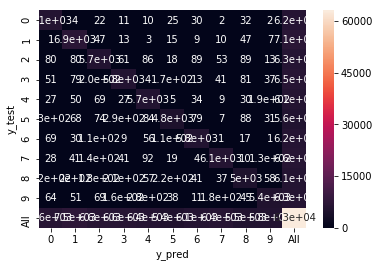

In [41]:
ensemble = VotingClassifier(estimators=[('lr', logistic), ('dt', detree), ('svm', svm)], voting='hard')
ensemble, acc = getScore (ensemble, X_train, X_E_test, y_train, y_E_test, True)

Result_ensemble['acc'].append(acc)

In [42]:
ensemble

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=50,
                                                 multi_class='warn', n_jobs=4,
                                                 penalty='l2',
                                                 random_state=None,
                                                 solver='sag', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('dt',
                              DecisionTreeClassifier(class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                

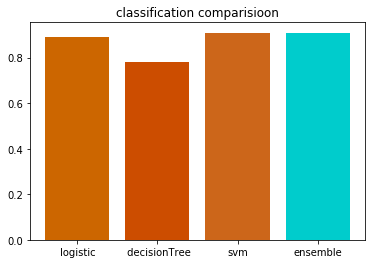

In [44]:
plt.title ('classification comparisioon')
plt.bar(Result_ensemble['model'], Result_ensemble['acc'], color = [(0.8,0.4,0),(0.8,0.3,0), (0.8,0.4,0.1), (0,0.8,0.8)])
plt.show()

In [45]:
Result_ensemble

{'model': ['logistic', ' decisionTree', 'svm', 'ensemble'],
 'acc': [0.892015873015873, 0.7815238095238095, 0.908063492063492, 0.909]}